Note that the algorithms are sensitive to the type of clustering, clustering hyperparameters, and also to small changes in the input values (e.g., if I use the lumonisities in linear space and then take the log versus transforming the flux to log space and then adding a distance term in log space).

In [1]:
import sys
import pandas as pd
import numpy as np
import os
sys.path.append(os.path.abspath("../0_UTILITY_FUNCTIONS/"))
from get_LrLx_data import *
from clustering import *

# With Interpolated Data: Only BH detections 

In [2]:
## Get the data
df = get_all_LrLx_data_filtered(names = None, interp=True, rerun = False, save=False, incl_Fx_uplims = False, incl_Fr_uplims = False, type_source= "BH")
Lr = df["Lr"].to_numpy()
Lx = df["Lx"].to_numpy()

Source names:  ['1A 1744-361', '4U 1543-47', '4U 1630-47', 'Cen X-4', 'Cir X-1', 'EXO 1846-031', 'GRS 1739-278', 'GRS 1915+105', 'GX 339-4', 'H1743-322', 'IGR J17091-3624', 'MAXI J1348-630', 'MAXI J1631-479', 'MAXI J1803-298', 'MAXI J1807+132', 'MAXI J1810-222', 'MAXI J1816-195', 'MAXI J1820+070', 'SAX J1808.4-3658', 'SAX J1810.8-2609', 'Swift J1727.8-1613', 'Swift J1728.9-3613', 'Swift J1842.5-1124', 'Swift J1858.6-0814', 'Vela X-1', 'XTE J1701-462']
Sources included after filtering:  ['4U 1543-47' '4U 1630-47' 'EXO 1846-031' 'GRS 1739-278' 'GX 339-4'
 'H1743-322' 'IGR J17091-3624' 'MAXI J1348-630' 'MAXI J1631-479'
 'MAXI J1803-298' 'MAXI J1810-222' 'MAXI J1820+070' 'Swift J1727.8-1613'
 'Swift J1842.5-1124']


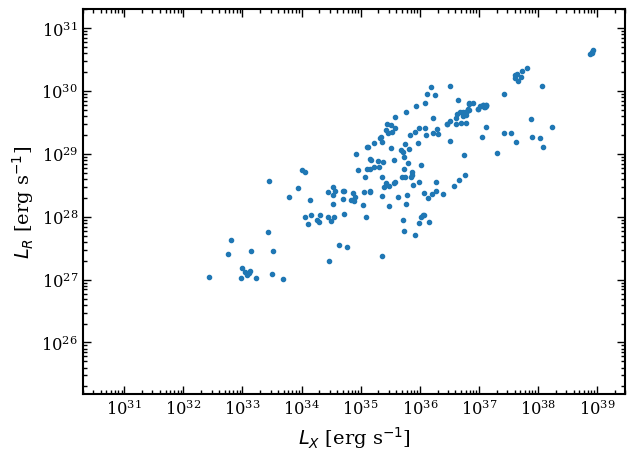

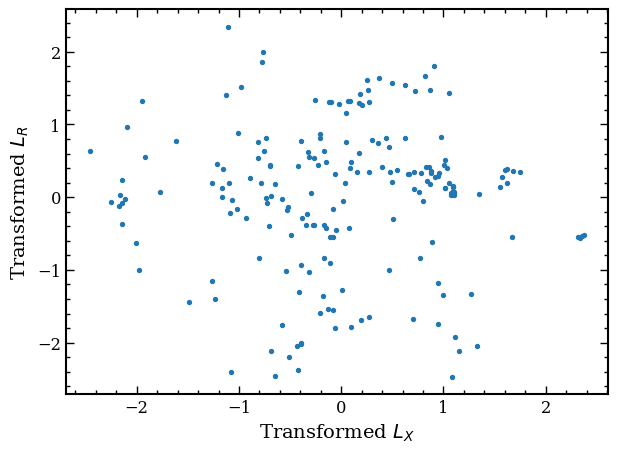

In [3]:
## Original data
data = np.column_stack((Lx, Lr))
plotLrLx(data)

## Transformed data
transformed_data = transform1(data)
plotLrLx_tranformed(transformed_data)

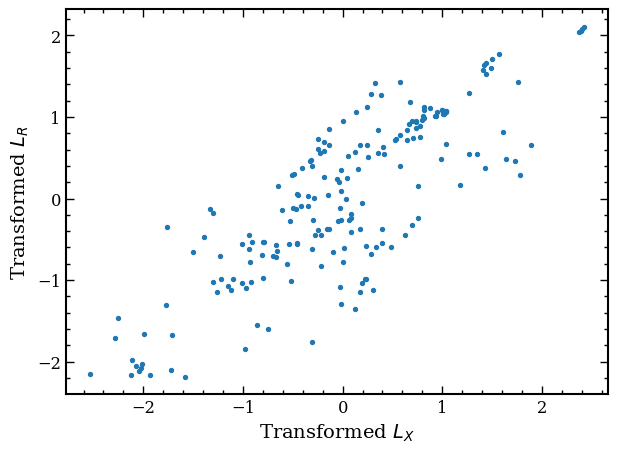

In [4]:
## Just standardised data
standardised_data = standardise(data)
plotLrLx_tranformed(standardised_data)

# Affinity Propagation with Other Parameters

Estimated number of clusters: 14
Silhouette Coefficient: 0.624


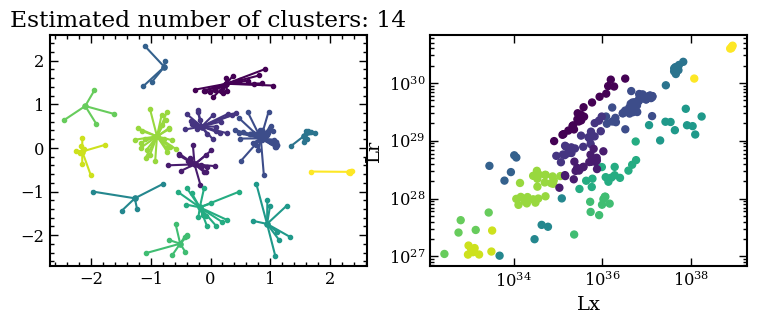

In [5]:
# Affinity Propagation Clustering, with no preference and damping = 0.9
_ = affinity_propagation(data, transformed_data, preference=None, damping =0.9, show_results2=False)

Estimated number of clusters: 3
Silhouette Coefficient: 0.577


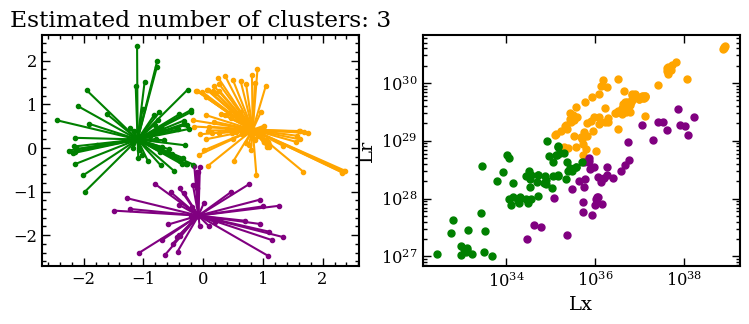

In [6]:
# Sensitive to the hyperparameters
_ =affinity_propagation(data, transformed_data, preference=-70, damping =0.8, show_results2=False)

Estimated number of clusters: 3
Silhouette Coefficient: 0.575


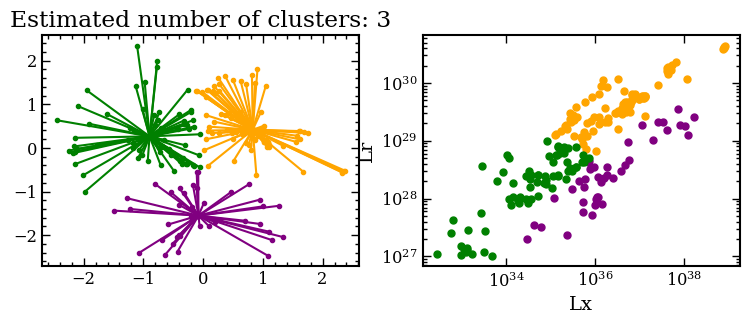

In [7]:
# Sensitive to the hyperparameters
_ =affinity_propagation(data, transformed_data, preference=-70, damping =0.5, show_results2=False)

Estimated number of clusters: 3
Silhouette Coefficient: 0.571


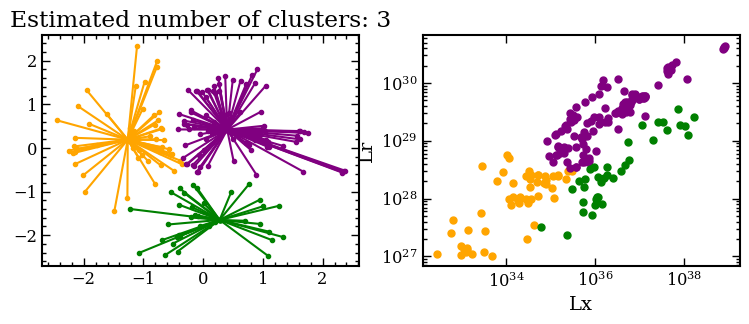

In [8]:
# Sensitive to the hyperparameters
_ =affinity_propagation(data, transformed_data, preference=-80, damping =0.5, show_results2=False)

Estimated number of clusters: 3
Silhouette Coefficient: 0.571


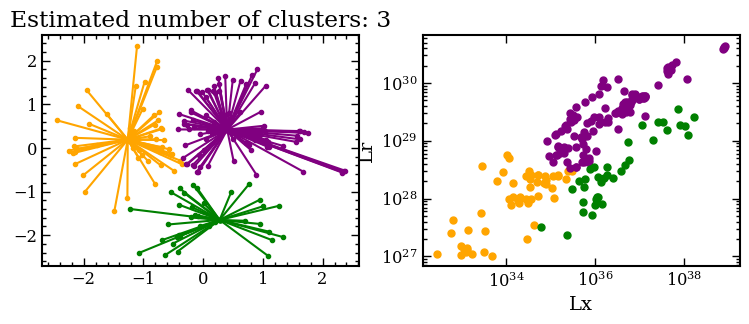

In [9]:
# Sensitive to the hyperparameters
_ =affinity_propagation(data, transformed_data, preference=-100, damping =0.5, show_results2=False)

Estimated number of clusters: 3
Silhouette Coefficient: 0.578


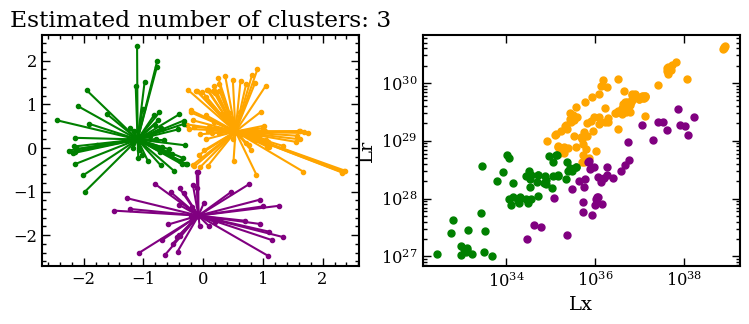

In [10]:
# Sensitive to the hyperparameters
_ =affinity_propagation(data, transformed_data, preference=-100, damping =0.8, show_results2=False)

Estimated number of clusters: 2
Silhouette Coefficient: 0.512


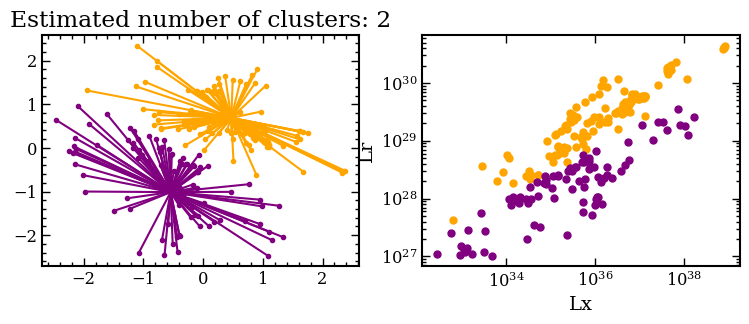

In [11]:
# Sensitive to the hyperparameters
_ =affinity_propagation(data, transformed_data, preference=-100, damping = 0.9, show_results2=False)

# K-MEANS

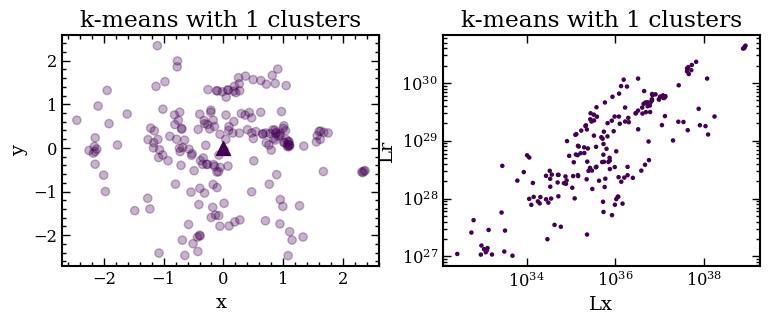

Silhouette for k=2:  0.3654778898995691


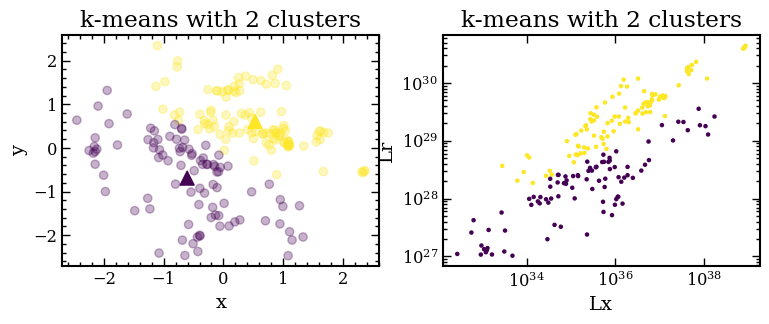

Silhouette for k=3:  0.40448414905517444


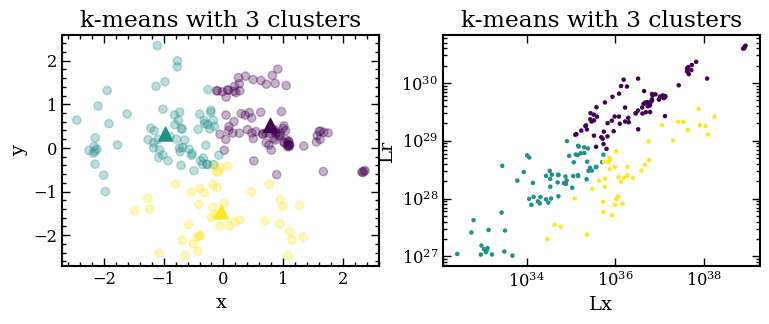

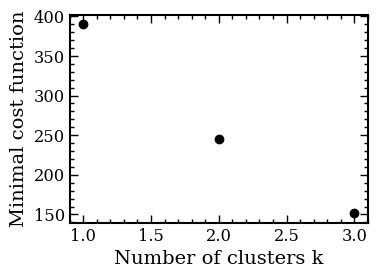

For n_clusters = 2 , the average silhouette_score is : 0.3654778898995691
For n_clusters = 3 , the average silhouette_score is : 0.40448414905517444


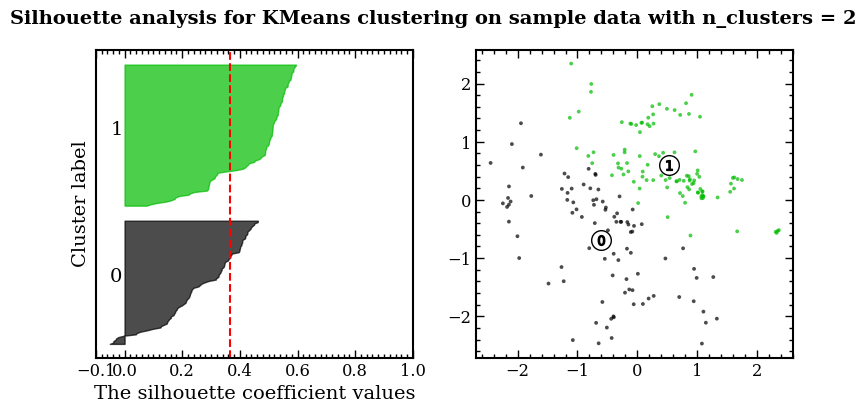

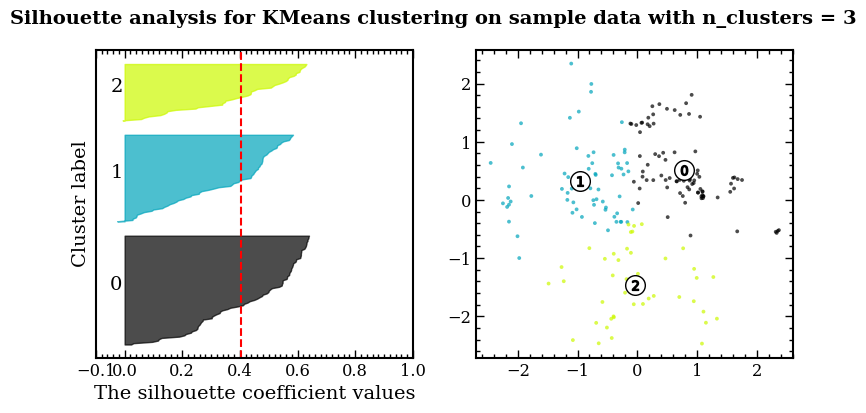

In [12]:
## K-MEANS CLUSTERING
run_kmeans(data, transformed_data, initialisation="random")

# DBScan

Estimated number of clusters: 1
Estimated number of noise points: 45
Silhouette Coefficient: 0.290


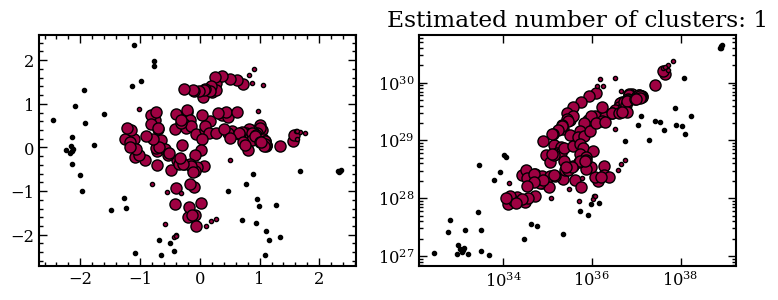

In [13]:
dbscan(data, transformed_data)

Estimated number of clusters: 1
Estimated number of noise points: 45
Silhouette Coefficient: 0.311


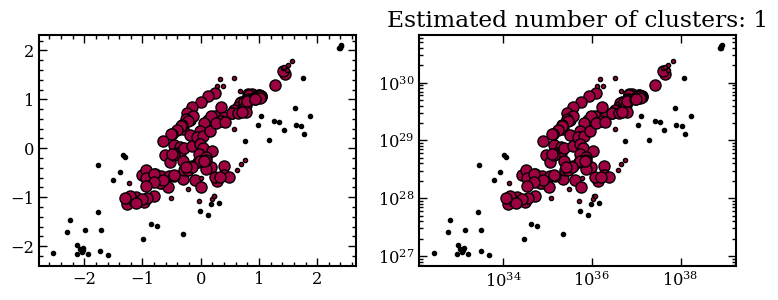

In [15]:
# Basically equivalent to above
dbscan(data, standardised_data, metric='mahalanobis')

Estimated number of clusters: 1
Estimated number of noise points: 70
Silhouette Coefficient: 0.285


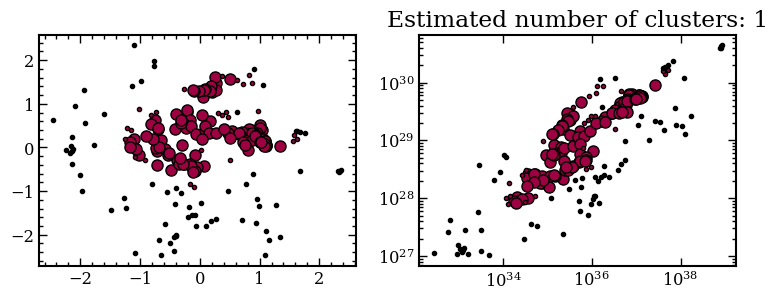

In [16]:
dbscan(data, transformed_data, eps=0.4)

# GMM

Best fit converged: True
BIC: n_components =  3


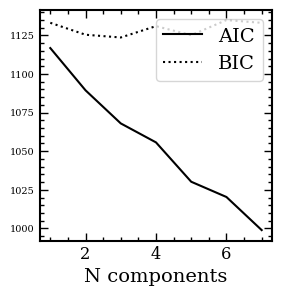

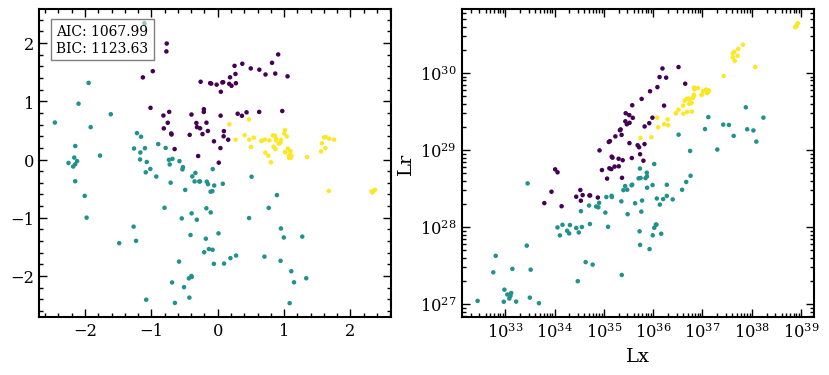

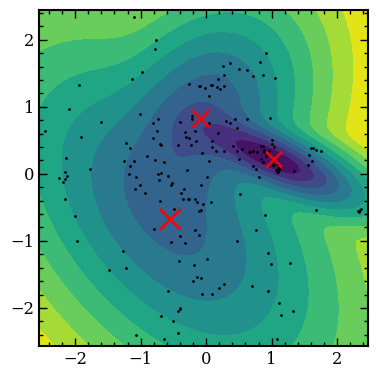

In [17]:
GMM(data, transformed_data, covariance_type="full")

Best fit converged: True
BIC: n_components =  2


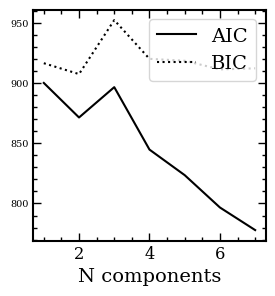

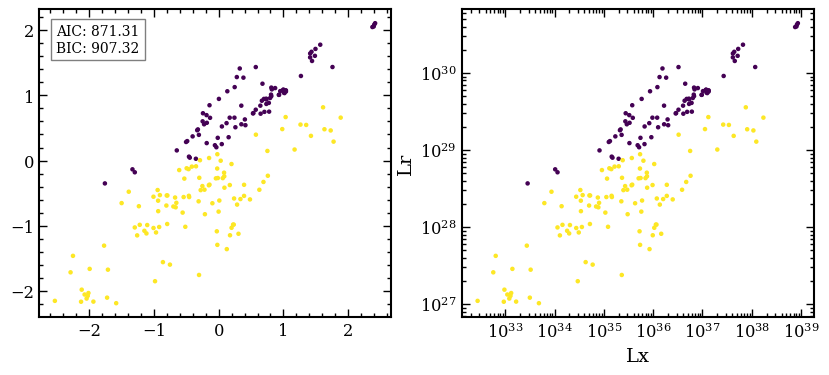

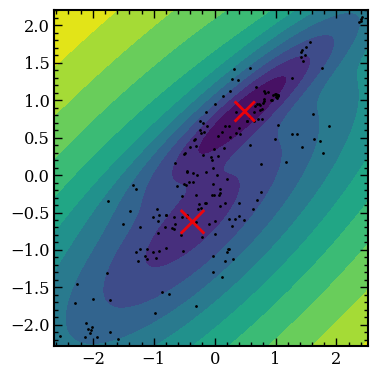

In [ ]:
# I can use the standardised data instead
GMM(data, standardised_data, covariance_type="full")

# Bayesian GMM

Effective number of components: 6


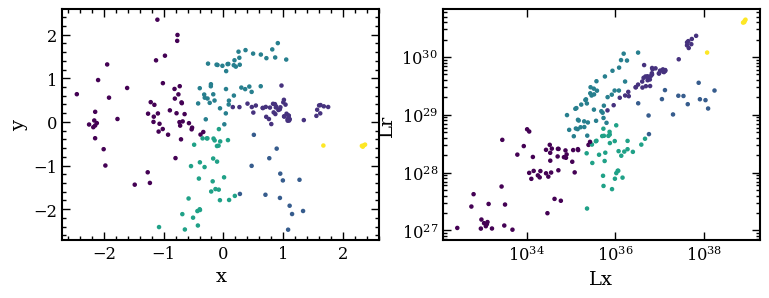

In [19]:
bayesian_GMM(data, transformed_data, covariance_type="full")

Effective number of components: 5


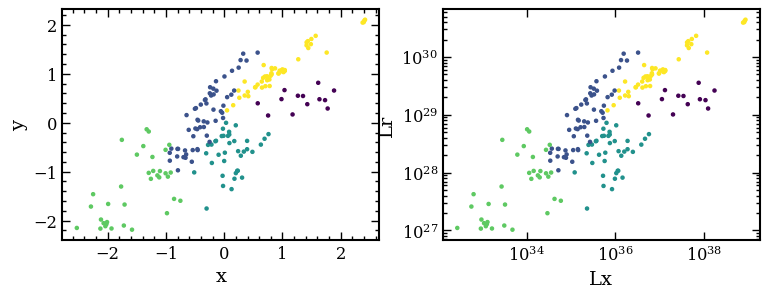

In [20]:
# Using standardised data
bayesian_GMM(data, standardised_data, covariance_type="full")

Effective number of components: 3


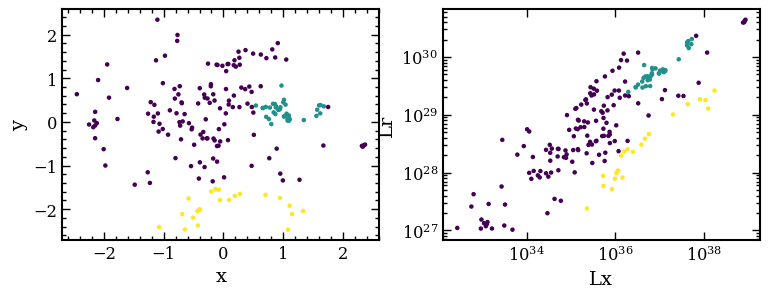

In [21]:
bayesian_GMM(data, transformed_data, covariance_type="spherical")

Effective number of components: 4


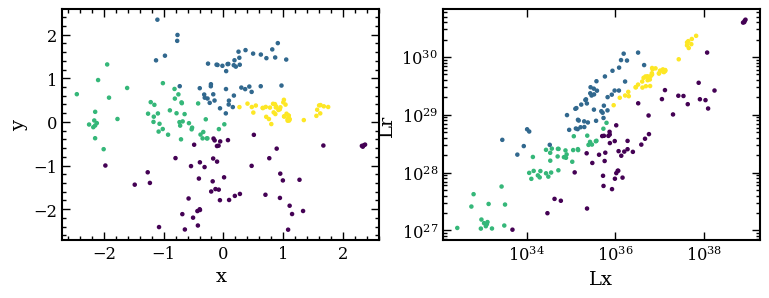

In [22]:
bayesian_GMM(data, transformed_data, covariance_type="diag")